# Sonar, Mines vs. Rocks

SUMMARY: This is the data set used by Gorman and Sejnowski in their study
of the classification of sonar signals using a neural network [1].  The
task is to train a network to discriminate between sonar signals bounced
off a metal cylinder and those bounced off a roughly cylindrical rock.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datafrm=pd.read_csv('sonar_csv.csv')

In [3]:
datafrm.head()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock


--------------------------------

checking NUll Values columnwise in dataframe

---------------

In [4]:
datafrm.dtypes

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
Class            object
Length: 61, dtype: object

In [5]:
datafrm['Class'].unique()

array(['Rock', 'Mine'], dtype=object)

------------------------------------------------------

Here in Class column we have only two calues Rock and Mine.
So I have converted this string value to integer using np.where methode.

We can do tha using One_Hot_Encoder type of LabelEncoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

datafrm['class']=le.fit_transform(datafrm['class'].astype(str))



-------------------------------------------------------

In [6]:
datafrm['Class']= np.where( datafrm['Class'] == 'Rock' ,0 ,1)

In [7]:
datafrm['Class'].isnull().sum()

0

In [8]:
datafrm[['attribute_1','attribute_2','attribute_3','attribute_4','attribute_5','attribute_6','attribute_7','attribute_8','attribute_9','attribute_10']].isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
attribute_6     0
attribute_7     0
attribute_8     0
attribute_9     0
attribute_10    0
dtype: int64

In [9]:
datafrm[['attribute_11','attribute_12','attribute_13','attribute_14','attribute_15','attribute_16','attribute_17','attribute_18','attribute_19','attribute_20']].isnull().sum()

attribute_11    0
attribute_12    0
attribute_13    0
attribute_14    0
attribute_15    0
attribute_16    0
attribute_17    0
attribute_18    0
attribute_19    0
attribute_20    0
dtype: int64

In [10]:
datafrm[['attribute_21','attribute_22','attribute_23','attribute_24','attribute_25','attribute_26','attribute_27','attribute_28','attribute_29','attribute_30']].isnull().sum()

attribute_21    0
attribute_22    0
attribute_23    0
attribute_24    0
attribute_25    0
attribute_26    0
attribute_27    0
attribute_28    0
attribute_29    0
attribute_30    0
dtype: int64

In [11]:
datafrm[['attribute_31','attribute_32','attribute_33','attribute_34','attribute_35','attribute_36','attribute_37','attribute_38','attribute_39','attribute_40']].isnull().sum()

attribute_31    0
attribute_32    0
attribute_33    0
attribute_34    0
attribute_35    0
attribute_36    0
attribute_37    0
attribute_38    0
attribute_39    0
attribute_40    0
dtype: int64

In [12]:
datafrm[['attribute_41','attribute_42','attribute_43','attribute_44','attribute_45','attribute_46','attribute_47','attribute_48','attribute_49','attribute_50']].isnull().sum()

attribute_41    0
attribute_42    0
attribute_43    0
attribute_44    0
attribute_45    0
attribute_46    0
attribute_47    0
attribute_48    0
attribute_49    0
attribute_50    0
dtype: int64

In [13]:
datafrm[['attribute_51','attribute_52','attribute_53','attribute_54','attribute_55','attribute_56','attribute_57','attribute_58','attribute_59','attribute_60']].isnull().sum()

attribute_51    0
attribute_52    0
attribute_53    0
attribute_54    0
attribute_55    0
attribute_56    0
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
dtype: int64

-------------------------------------
from mean,median,std we can check the skewness and range of data spread and accordingly we will try ti minimize the skewness.

Also by checking max and 75% value difference we can analyze the outliers

In [14]:
datafrm.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


attribute_1       AxesSubplot(0.125,0.816017;0.0945122x0.0639831)
attribute_2     AxesSubplot(0.238415,0.816017;0.0945122x0.0639...
attribute_3     AxesSubplot(0.351829,0.816017;0.0945122x0.0639...
attribute_4     AxesSubplot(0.465244,0.816017;0.0945122x0.0639...
attribute_5     AxesSubplot(0.578659,0.816017;0.0945122x0.0639...
                                      ...                        
attribute_57       AxesSubplot(0.125,0.20178;0.0945122x0.0639831)
attribute_58    AxesSubplot(0.238415,0.20178;0.0945122x0.0639831)
attribute_59    AxesSubplot(0.351829,0.20178;0.0945122x0.0639831)
attribute_60    AxesSubplot(0.465244,0.20178;0.0945122x0.0639831)
Class           AxesSubplot(0.578659,0.20178;0.0945122x0.0639831)
Length: 61, dtype: object

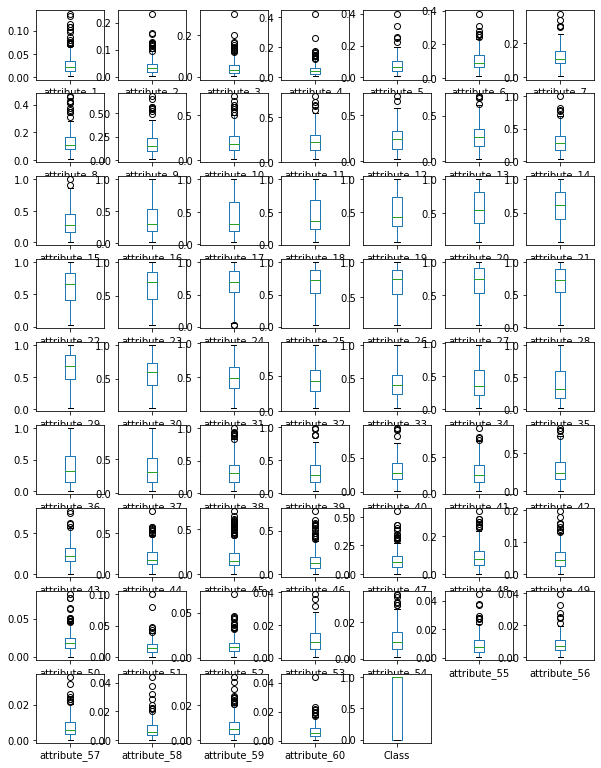

In [15]:
datafrm.plot(kind='box',subplots=True,layout=(10,7),figsize=(10,15))

----------------------------
Our Class column is String so we can use One_Hot_Encoder


-------------------------------------------------

In [16]:
x=datafrm.iloc[:,:-1]
y=datafrm.iloc[:,-1]

In [17]:
from sklearn.decomposition import PCA


pca = PCA(n_components=10)
xpca = pca.fit_transform(x)

x = pd.DataFrame(data=xpca)
x




,0,1,2,3,4,5,6,7,8,9
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120


In [18]:
dataf=pd.concat([x,y],axis=1)
dataf


,0,1,2,3,4,5,6,7,8,9,Class
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,0
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,0
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,0
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,0
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,0
...,...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179,1
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296,1
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044,1
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120,1


------------

corr=dataf.corr()
corr

plt.figure(figsize=(15,15))

sns.heatmap(corr,annot=True)

plt.show()

-----------


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler




In [20]:
model_lst=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

def trn_tst_split(model,inpt,outpt,rs=0):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=rs)
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    pred_val=model.predict(x_test)
    return accuracy_score(y_test,pred_val)

best_rndm_state=[]
model_name=[]
accur_score=[]
cross_val_scr=[]
for algo in model_lst:
    d={}
    a=str(algo)  
    a=a.split('(')[0]
    for i in range(0,100):
        scr = trn_tst_split(algo,x,y,i)
        if scr > 0:
            d[i,a]=[scr*100]
        #        if scr > .82:
        #            print (a,'---------',i,'-------',scr)
    random_st = max(d , key=d.get)
    #print ('\nRandom_state with Model :',random_st,' Accurecy Score is :',(d[random_st]),'\n')
    best_rndm_state.append(random_st[0])
    model_name.append(random_st[1])
    accur_score.append(d[random_st])
    cvs=cross_val_score(algo,x,y,scoring='accuracy',cv=15)
    #print('Scoreing Methode :', i,' Mean of Corss_val_Score :',max(lst)[0],' & Std. Deviation :',max(lst)[1])
    cross_val_scr.append(cvs.mean()*100)
print ('\n')
print('---------------Details of all Classification Algorithms---------------')
result=pd.DataFrame({'Model': model_name,'Best_Random_State':best_rndm_state,'Accuracy_Score':accur_score,'Cross_Val_Score':cross_val_scr})
result



---------------Details of all Classification Algorithms---------------


,Model,Best_Random_State,Accurecy_Score,Cross_Val_Score
0,LogisticRegression,12,[88.09523809523809],68.278388
1,GaussianNB,89,[92.85714285714286],62.051282
2,SVC,93,[92.85714285714286],65.970696
3,DecisionTreeClassifier,23,[88.09523809523809],58.168498
4,KNeighborsClassifier,13,[88.09523809523809],60.622711


-----------------

# OverFitting Issue because Accuracy_Score is high and Cross_Val score is low as compaired to Accurecy Score

Lets use Ensemble Methode RandomForestClassifier and check the score 


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=93)




from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=93)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,pred))
print('Confusion Matrix :',confusion_matrix(y_test,pred))
print('classification_report :',classification_report(y_test,pred))

Accuracy Score : 0.8809523809523809
Confusion Matrix : [[15  4]
 [ 1 22]]
classification_report :               precision    recall  f1-score   support

           0       0.94      0.79      0.86        19
           1       0.85      0.96      0.90        23

    accuracy                           0.88        42
   macro avg       0.89      0.87      0.88        42
weighted avg       0.89      0.88      0.88        42



In [29]:
svc=SVC()
svc.fit(x_train,y_train)
predval=svc.predict(x_test)
print('Accuracy Score :',accuracy_score(y_test,predval))
print('Confusion Matrix :',confusion_matrix(y_test,predval))
print('Classification Report :',classification_report(y_test,predval))

Accuracy Score : 0.9285714285714286
Confusion Matrix : [[16  3]
 [ 0 23]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      0.84      0.91        19
           1       0.88      1.00      0.94        23

    accuracy                           0.93        42
   macro avg       0.94      0.92      0.93        42
weighted avg       0.94      0.93      0.93        42



---------------------------------------

Score of Support Vector Machine is high as compaired to other classification algorithm.


---------------------------------------

In [31]:
import joblib

joblib.dump(svc,'Sonar.pkl')


['Sonar.pkl']